<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521688-DinhThiAnhNguyet/DELL_Seq2seq_721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Import thư viện
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2. # 2. Đọc file csv và gắn index với giá Close
data=pd.read_csv("/content/drive/MyDrive/DataFiles/DataFinal/DELL.csv")
data1=data.reset_index()['Close']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(data1))
test_size = int(0.2 * len(data1))
val_size = len(data1) - train_size - test_size

train_data = data1[:train_size]
test_data = data1[train_size:train_size+test_size]
val_data = data1[train_size+test_size:]


In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100

train_X, train_Y = create_dataset(train_data, time_step)
test_X, test_Y = create_dataset(test_data, time_step)
valid_X, valid_Y = create_dataset(val_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for seq2seq
train_X =train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1] , 1)
valid_X = valid_X.reshape(valid_X.shape[0],valid_X.shape[1] , 1)

In [ ]:
#8. Xây dựng mô hình Seq2Seq
model = Sequential()
model.add(LSTM(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [ ]:
#9. Huấn luyện mô hình
model.fit(train_X, train_Y,validation_data=(test_X,test_Y), epochs=50, batch_size=32)

Epoch 1/50
28/28 [==============================] - 5s 80ms/step - loss: 0.0248 - val_loss: 0.0050
Epoch 2/50
28/28 [==============================] - 1s 50ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 3/50
28/28 [==============================] - 1s 47ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 4/50
28/28 [==============================] - 1s 48ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 5/50
28/28 [==============================] - 2s 86ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 6/50
28/28 [==============================] - 2s 82ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 7/50
28/28 [==============================] - 1s 48ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 8/50
28/28 [==============================] - 1s 49ms/step - loss: 9.6309e-04 - val_loss: 0.0035
Epoch 9/50
28/28 [==============================] - 1s 48ms/step - loss: 9.3077e-04 - val_loss: 0.0034
Epoch 10/50
28/28 [==============================] - 1s 48ms/step - loss: 9.2917e-04 - val_loss: 0.00

In [ ]:
# 10. Dự báo dữ liệu train, test, val
train_predict=model.predict(train_X)
y_pred=model.predict(test_X)
y_pred_val=model.predict(valid_X)

2/2 [==============================] - 0s 13ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - valid_Y)**2))
test_rmse = np.sqrt(np.mean((y_pred - test_Y)**2))
valid_mae = np.mean(np.abs((y_pred_val - valid_Y)))
test_mae = np.mean(np.abs((y_pred - test_Y)))
valid_mape = np.mean(np.abs((y_pred_val - valid_Y)/valid_Y))
test_mape = np.mean(np.abs((y_pred - test_Y)/test_Y))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 44.27152990347258
Testing RMSE: 43.590793557071265
Validation MAE: 44.2421083966656
Testing MAE: 43.24512853966355
Validation MAPE: 66.3879855315361
Testing MAPE: 70.44060044984661


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):

    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.71988887]
101
1 day input [0.57236487 0.56261139 0.56109418 0.57128118 0.55654259 0.55004022
 0.5632616  0.57648298 0.60227543 0.59837413 0.57063088 0.59295554
 0.58970434 0.59403923 0.6087778  0.62351639 0.61549681 0.61051171
 0.6087778  0.60357593 0.59078804 0.58905413 0.59382245 0.58471926
 0.57149788 0.56369508 0.55936021 0.55350811 0.54527192 0.52966636
 0.50647479 0.52316405 0.5021399  0.47873163 0.47548046 0.49672131
 0.49585431 0.50755849 0.48956881 0.51839567 0.53140035 0.50820879
 0.50257341 0.49303671 0.50625809 0.51319387 0.53075006 0.54678913
 0.55437511 0.57084767 0.56868019 0.56716298 0.55480862 0.58081785
 0.58450245 0.59035455 0.60726062 0.6209154  0.63500376 0.6690325
 0.63283636 0.61311261 0.6172308  0.6079108  0.58688665 0.58601966
 0.61051171 0.62546708 0.63261958 0.65299343 0.66166322 0.64042235
 0.6666483  0.68030317 0.6794362  0.67618509 0.65169304 0.65299343
 0.65667812 0.6664316  0.67661849 0.70414495 0.71779982 0.71324822
 0.68745567 0.67791899 0.7249524  

Validation RMSE: 44.27152990347258
Testing RMSE: 43.590793557071265
Validation MAE: 44.2421083966656
Testing MAE: 43.24512853966355
Validation MAPE: 66.3879855315361
Testing MAPE: 70.44060044984661


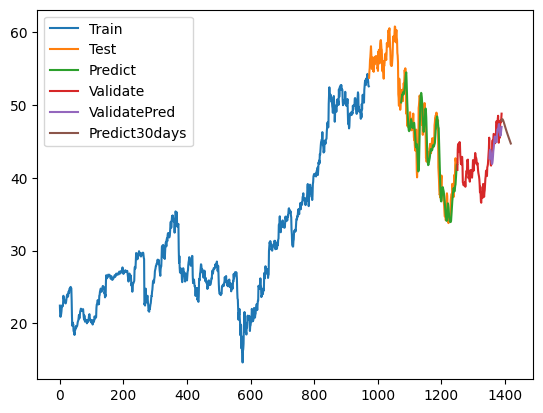

In [ ]:
# 14.Vẽ hình
import matplotlib.pyplot as plt
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(data1)-1, stop=len(data1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()